# Cellular Automatons / Nubots Playground

This file is meant as a playground for the programming project biophysics/ cellular automata

Ideas/ Suggestions:

- Simple shapes to start with
- Probabilistic automata
- Methods from [the paper](https://dna.hamilton.ie/woods/download/nubots.pdf)
- Maybe try different lattices

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import random as rd

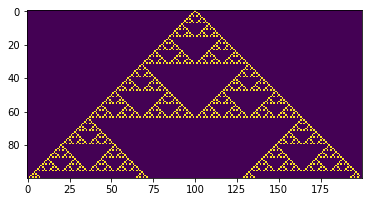

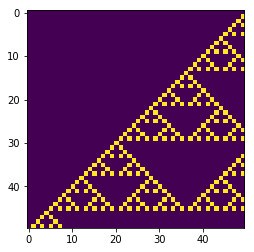

In [2]:
# Sierpinski triangles

N = 200
t = 100

field = np.zeros((t, N))
field[0, int(N/2)] = 1

for i in range(0, t - 1):
    for x in range(1, N - 1):
        field[i+1, x] = bool(field[i, x-1]) ^ bool(field[i, x+1]) #logical XOR

plt.imshow(field)
plt.show()
plt.imshow(field[50:,:50])
plt.show()
#plt.savefig('sierpinski_automaton.png', dpi=300, format='png')

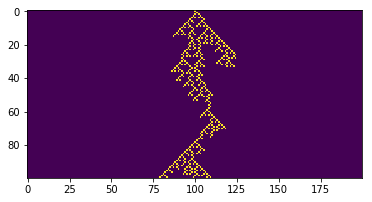

In [3]:
# Probabilistic Sierpinski triangles

N = 200
t = 100

field = np.zeros((t, N))
field[0, int(N/2)] = 1

for i in range(0, t - 1):
    for x in range(1, N - 1):
        random_prob = rd.uniform(0, 1)
        if random_prob > 0.2:      # larger values usually lead to a small tree. where lays p_c and why?
            field[i+1, x] = bool(field[i, x-1]) ^ bool(field[i, x+1]) #logical XOR

plt.imshow(field)
plt.show()
#plt.savefig('sierpinski_automaton.png', dpi=300, format='png')

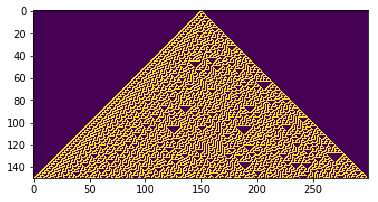

In [4]:
# Rule 30

N = 300
t = 150

field = np.zeros((t, N))
field[0, int(N/2)] = 1

for i in range(0, t - 1):
    for x in range(1, N - 1):
        if field[i, x-1]==1 and field[i, x]==1 and field[i, x+1]==1:
            field[i+1, x] = 0
        elif field[i, x-1]==1 and field[i, x]==1 and field[i, x+1]==0:
            field[i+1, x] = 0
        elif field[i, x-1]==1 and field[i, x]==0 and field[i, x+1]==1:
            field[i+1, x] = 0
        elif field[i, x-1]==1 and field[i, x]==0 and field[i, x+1]==0:
            field[i+1, x] = 1
        elif field[i, x-1]==0 and field[i, x]==1 and field[i, x+1]==1:
            field[i+1, x] = 1
        elif field[i, x-1]==0 and field[i, x]==1 and field[i, x+1]==0:
            field[i+1, x] = 1
        elif field[i, x-1]==0 and field[i, x]==0 and field[i, x+1]==1:
            field[i+1, x] = 1
        elif field[i, x-1]==0 and field[i, x]==0 and field[i, x+1]==0:
            field[i+1, x] = 0

plt.imshow(field)
plt.show()
#plt.savefig('rule30_automaton.png', dpi=300, format='png')

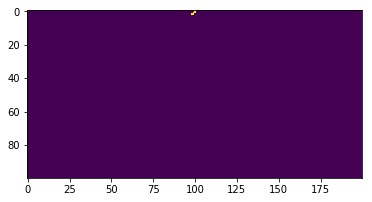

In [5]:
# Rule 30 probabilistic

N = 200
t = 100

field = np.zeros((t, N))
field[0, int(N/2)] = 1

for i in range(0, t - 1):
    for x in range(1, N - 1):
        random_prob = rd.uniform(0, 1)
        
        # by giving different weight, one can crystallize out specific behaviour
        
        if random_prob > 0.3:
            if field[i, x-1]==1 and field[i, x]==1 and field[i, x+1]==1:
                field[i+1, x] = 0
        if random_prob > 0.25:
            if field[i, x-1]==1 and field[i, x]==1 and field[i, x+1]==0:
                field[i+1, x] = 0
        if random_prob > 0.7:
            if field[i, x-1]==1 and field[i, x]==0 and field[i, x+1]==1:
                field[i+1, x] = 0
        if random_prob < 0.3:
            if field[i, x-1]==1 and field[i, x]==0 and field[i, x+1]==0:
                field[i+1, x] = 1
        if random_prob < 0.7:
            if field[i, x-1]==0 and field[i, x]==1 and field[i, x+1]==1:
                field[i+1, x] = 1
        if random_prob > 0.05:
            if field[i, x-1]==0 and field[i, x]==1 and field[i, x+1]==0:
                field[i+1, x] = 1
        if random_prob < 0.9:
            if field[i, x-1]==0 and field[i, x]==0 and field[i, x+1]==1:
                field[i+1, x] = 1
        if random_prob > 0.1:
            if field[i, x-1]==0 and field[i, x]==0 and field[i, x+1]==0:
                field[i+1, x] = 0

plt.imshow(field)
plt.show()
#plt.savefig('sierpinski_automaton.png', dpi=300, format='png')

All above presented examples are still synchronous examples. For more efficient structure generation use asynchronous ones by applying sets of rules.

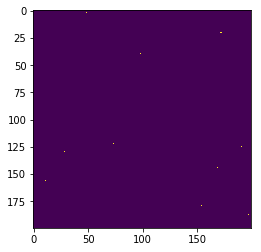

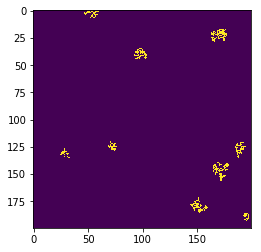

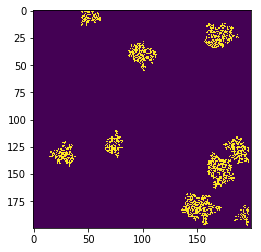

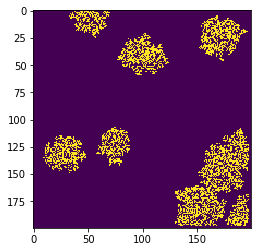

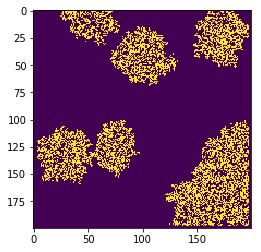

In [6]:
# Test Run asynchronous, still same time steps

N = 200
t = 100
nseeds = 10 # number of seeds

field = np.zeros((N, N))

for i in range(0, nseeds):
    # initialize seeds    
    field[rd.randrange(0,N-1), rd.randrange(0,N-1)] = 1

plt.imshow(field)
plt.show()

# Apply rules similar to Game of Life rules
for i in range(0, 4):
    for j in range(0, int(t/4)):
        time = i*int(t/4)+j
        
        for x in range(1, N - 2):
            for y in range(1, N - 2):
                # if at least one neighbour on, have higher probability to be turned on
                if field[x, y-1]==1 or field[x, y+1]==1 or field[x-1, y]==1 or field[x+1, y]==1:
                    if rd.uniform(0, 1) < 0.2:
                        field[x, y] = 1
                
                # small probability to create life out of nowhere
                #if rd.uniform(0, 1) < 0.05:
                #    if field[x, y-1]==0 or field[x, y+1]==0 or field[x-1, y]==0 or field[x+1, y]==0:
                #        field[x, y] = 1
                
                # small probability to die randomly
                if rd.uniform(0, 1) < 0.15:
                    field[x, y] = 0
    plt.imshow(field)
    plt.show()
#plt.savefig('variation_game_of_life.png', dpi=300, format='png')

Further Notes:
    
- Passive self-assembly / static after creation (e.g. DNA Origami)
- Active nanostructures (e.g. DNA-based walkers, molecular motors)